<h3> CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [3]:

df=pd.read_csv('IRIS.csv')
df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h4> Based on the values of data find the type of flower -> multiple classification problem

<Axes: xlabel='petal_length', ylabel='petal_width'>

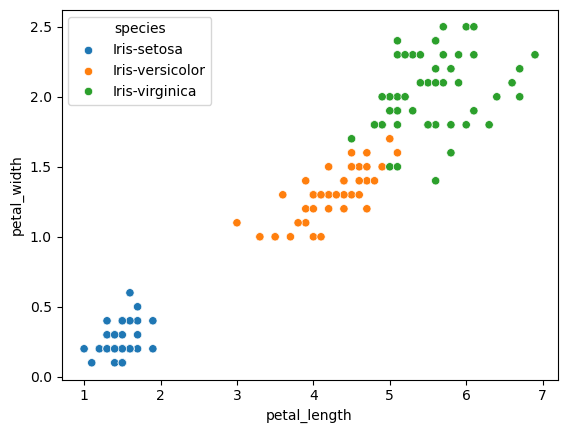

In [5]:
sns.scatterplot(x="petal_length",y="petal_width",hue="species",data=df)

In [4]:
#setosa is easily distinguishable
#no threshold value for virginica and versicolor

<h3> CLASSIFICATION-LOGISTIC REGRESSION

In [6]:
df=pd.read_csv('diabetes.csv')
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df["DiabetesPedigreeFunction"]=df["DiabetesPedigreeFunction"].replace({"Yes":1,"No":0})
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


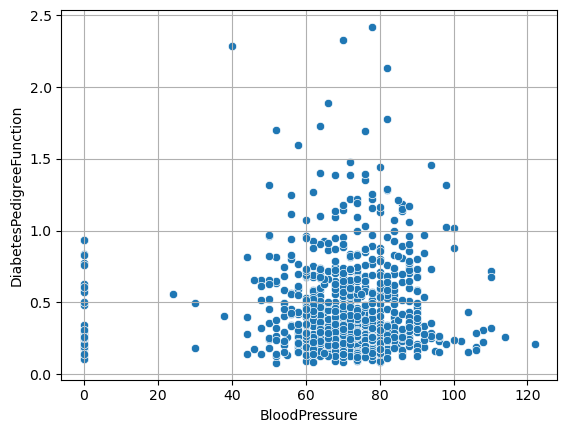

In [10]:
sns.scatterplot(x="BloodPressure",y="DiabetesPedigreeFunction",data=df)
plt.grid(True)

In [11]:
#border area exists

<h5> Logistic regression assigns probability-> tells you probability of being diabetic
<h5> Logistic regression = Probabilistic regression

In [12]:
#Exploring Sigmoid function

In [13]:
arr=np.arange(-10,10,.01)

In [14]:
arr.shape

(2000,)

In [15]:
arr[:10]

array([-10.  ,  -9.99,  -9.98,  -9.97,  -9.96,  -9.95,  -9.94,  -9.93,
        -9.92,  -9.91])

In [16]:
1/(1+np.e**-(-10))

4.539786870243442e-05

In [17]:
sigarr=1/(1+np.exp(-arr))
sigarr.shape

(2000,)

In [18]:
list(zip(arr,sigarr))[:5]

[(np.float64(-10.0), np.float64(4.5397868702434395e-05)),
 (np.float64(-9.99), np.float64(4.5854103946941324e-05)),
 (np.float64(-9.98), np.float64(4.631492400926818e-05)),
 (np.float64(-9.97), np.float64(4.6780374959063265e-05)),
 (np.float64(-9.96), np.float64(4.7250503328810105e-05))]

<Axes: >

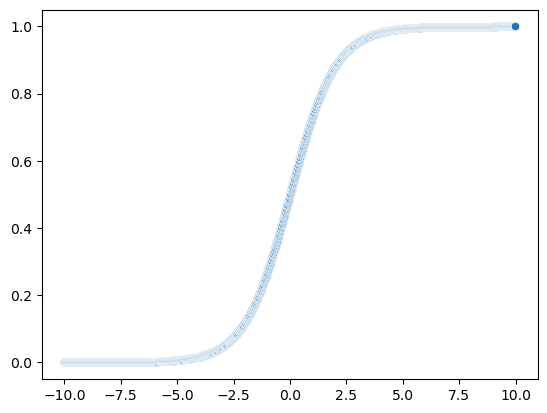

In [19]:
sns.scatterplot(x=arr,y=sigarr)

In [20]:
#value is always between 0 and 1, gives probability value

<h3> Develop a model which can easily calssify whether a flower is virginica or not
<h4> Binary Classification

In [23]:
df=pd.read_csv('IRIS.csv')
df["type"]=(df["species"]=='Iris-virginica').astype('int')# cpnverts bool to int
df

,sepal_length,sepal_width,petal_length,petal_width,species,type
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


<Axes: xlabel='petal_length', ylabel='petal_width'>

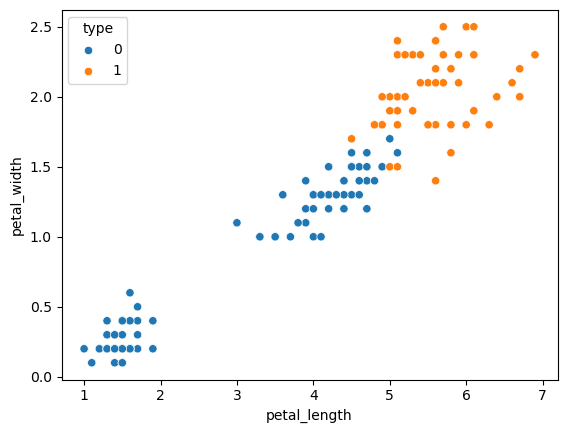

In [25]:
sns.scatterplot(x="petal_length",y="petal_width",hue="type",data=df)

In [26]:
#dividing data

In [28]:
X=df.drop(["species","type"],axis=1)

In [29]:
y=df["type"]

In [30]:
X.shape

(150, 4)

In [31]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=42)

In [32]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
probtest=model.predict_proba(Xtest)
probtrain=model.predict_proba(Xtrain)

In [33]:
probtrain[:3] #probability of 0, probability of 1 ->from Xtrain set

array([[0.04916958, 0.95083042],
       [0.02109292, 0.97890708],
       [0.11601356, 0.88398644]])

In [34]:
ytrain[:3]

128    1
131    1
145    1
Name: type, dtype: int64

In [35]:
Xtrain[:3]

,sepal_length,sepal_width,petal_length,petal_width
128,6.4,2.8,5.6,2.1
131,7.9,3.8,6.4,2.0
145,6.7,3.0,5.2,2.3


In [36]:
#probability of 128 being virginica is .57, 131 is .11, 145 is .26

In [37]:
model.coef_ #straight line of sigmoid func. that runs straight from the border area(c1 to c4 values)

array([[-0.35458477, -0.6314184 ,  2.81566766,  2.13800115]])

In [38]:
model.intercept_#c0 value

array([-13.25816668])

In [39]:
# these values form eqtn of y and then used in sigmoid funct to give Probability

In [40]:
type(probtrain)

numpy.ndarray

In [41]:
probtrain[:,1]#:->all rows for second column

array([9.50830420e-01, 9.78907075e-01, 8.83986441e-01, 9.51053566e-01,
       9.78957826e-01, 4.68521668e-06, 6.23764178e-06, 9.01599098e-07,
       2.30866485e-06, 9.89325013e-02, 5.16124457e-06, 2.89967104e-06,
       7.44586221e-01, 1.58351945e-01, 3.17287216e-06, 2.41294098e-06,
       1.75415540e-06, 8.02583349e-01, 1.91360900e-01, 2.40371849e-01,
       2.00495331e-06, 2.60501167e-06, 1.52498907e-02, 5.76124634e-01,
       8.64088113e-01, 1.08076405e-01, 9.88298785e-01, 7.54939165e-02,
       9.94653450e-01, 2.20872277e-01, 2.48067233e-06, 9.95433970e-01,
       3.43118738e-02, 2.55030489e-06, 2.40180738e-06, 1.28652230e-05,
       1.33725374e-02, 6.10233351e-01, 1.20115801e-05, 6.18933175e-06,
       1.24398370e-05, 8.75865810e-02, 3.50166023e-06, 5.82964398e-02,
       9.94407477e-01, 3.57958342e-06, 8.31015651e-02, 8.17051097e-01,
       1.38362094e-06, 5.20906890e-01, 8.02583349e-01, 3.31140148e-02,
       2.33317347e-01, 9.25435037e-01, 6.79526111e-02, 6.18349508e-06,
      

In [42]:
(probtrain[:,1]>=.5).astype("int") #changing to discrete value

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [43]:
predtrain=model.predict(Xtrain) #always takes predict value as .5
predtest=model.predict(Xtest)                       

In [44]:
predtest[:5]

array([0, 0, 1, 0, 0])

In [45]:
#incase of pred_proba we can choose our own threshold value,but incase of pred we cannot, it's not in our hands

In [47]:
df=pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
df.shape

(768, 9)

In [49]:
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
#target is recall as FN should be lowered

<h3> ML Model to check if a  person is diabetic or not

<h4> Data cleaning

In [51]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
#no null 

In [55]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
#pgc,bp,insulin,tsft min is zero-> wrong data. Cannot be zero

In [59]:
df[df["Pregnancies"]==0].shape[0]

111

In [61]:
df[df["BloodPressure"]==0].shape[0]

35

In [62]:
df[df["SkinThickness"]==0].shape[0] #v high

227

In [63]:
df[df["SkinThickness"]==0].shape[0]/df.shape[0] #30% data is zero in this column

0.2955729166666667

In [65]:
df[df["Insulin"]==0].shape[0] # v high

374

In [66]:
df[df["Insulin"]==0].shape[0]/df.shape[0] #48% data is zero in this column

0.4869791666666667

In [67]:
df[df["BMI"]==0].shape[0]

11

In [56]:
#tsft insulin column have immense zero datas-> columns are dropped

In [68]:
df=df.drop(["SkinThickness","Insulin"],axis=1)

In [69]:
df[:5]

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [70]:
#reccords where pgc is zero is discarded-> rows are deleted

In [71]:
df=df[df['Pregnancies']!=0]

In [72]:
df[df["Pregnancies"]==0].shape[0]#all non zero values now

0

In [73]:
df=df[df['BloodPressure']!=0]

In [74]:
df=df[df['BMI']!=0]

In [75]:
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,4.465079,120.688889,72.128571,32.023968,0.468130,34.203175,0.347619
std,3.214814,32.616649,12.350768,6.425415,0.316586,11.763974,0.476593
min,1.000000,0.000000,24.000000,18.200000,0.084000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,27.400000,0.244250,25.000000,0.000000
50%,4.000000,116.000000,72.000000,32.000000,0.378000,30.500000,0.000000
75%,7.000000,142.000000,80.000000,35.900000,0.626750,41.750000,1.000000
max,17.000000,199.000000,122.000000,57.300000,2.329000,81.000000,1.000000


<h4> Scaling

In [76]:
df.shape

(630, 7)

In [78]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [79]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.25,random_state=42)

In [80]:
Xtrain.shape

(472, 6)

In [81]:
cols=list(Xtrain.columns)

In [82]:
cols #continuous column list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [83]:
scaler=preprocessing.StandardScaler()#class object created
scaler.fit(Xtrain[cols]) #calculates mean and sd for all the cont columns one at a time
Xtrain[cols]=scaler.transform(Xtrain[cols])
Xtest[cols]=scaler.transform(Xtest[cols])

In [84]:
Xtrain[:3] #Standardized

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
375,2.394413,0.603577,0.782353,1.087897,0.165180,2.008626
722,-1.109474,0.881337,-0.332546,-0.445780,-0.371641,0.651087
234,-0.472404,-1.433325,-0.332546,-0.383813,-0.539586,-0.960991


<h4> Model creation

In [85]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)

LogisticRegression()

In [86]:
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

<h4> Find Classification Metrics

In [87]:
metrics.confusion_matrix(ytrain,predtrain)

array([[264,  38],
       [ 71,  99]])

In [88]:
# TN=305,FP=44,FN=75,TP=119. FN=75-> 75 diabetic people have been predicted to be not diabetic

In [89]:
metrics.accuracy_score(ytrain,predtrain) #(TP+TN)/(TN+FP+FN+TP)
#78.08%

0.7690677966101694

In [90]:
metrics.recall_score(ytrain,predtrain)#61.34%

0.5823529411764706

In [91]:
def printscores(act,pred):
    print("accuracy :",metrics.accuracy_score(act,pred))
    print("recall :",metrics.recall_score(act,pred))
    print("precision :",metrics.precision_score(act,pred))
    print("f1 :",metrics.f1_score(act,pred))
    print("AUC :",metrics.roc_auc_score(act,pred))

In [92]:
print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)

TRAINING MERICS:
accuracy : 0.7690677966101694
recall : 0.5823529411764706
precision : 0.7226277372262774
f1 : 0.6449511400651465
AUC : 0.7282625633034672
TEST METRICS:
accuracy : 0.7911392405063291
recall : 0.6122448979591837
precision : 0.6818181818181818
f1 : 0.6451612903225806
AUC : 0.7419022654933534


<h4> Cross Validation of Model

In [95]:
model=linear_model.LogisticRegression()
arr=model_selection.cross_val_score(model,X,y,cv=5,scoring="recall") #cv=5blocks
#scoring->every interation finds recall value that is returned

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
arr

array([0.63636364, 0.56818182, 0.59090909, 0.5       , 0.51162791])

In [97]:
arr.mean()
#mean is bad-> this implies data cannot give proper detection for negatives,not enough negatives in dataset

np.float64(0.561416490486258)

In [98]:
arr.std()

np.float64(0.0505639123589674)

In [99]:
#roc_auc curve->receiver operating

In [100]:
model=linear_model.LogisticRegression()
arr=model_selection.cross_val_score(model,X,y,cv=5,scoring="roc_auc") 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
arr.mean()

np.float64(0.8316216446252188)

In [102]:
y.value_counts()/y.shape[0]

Outcome
0    0.652381
1    0.347619
Name: count, dtype: float64

In [103]:
ytrain.value_counts()/ytrain.shape[0]

Outcome
0    0.639831
1    0.360169
Name: count, dtype: float64

In [104]:
######## LOGISTIC REGRESSION USING STATSMODELS #########
####### Useful for feature selection #################
import statsmodels.api as sm
 
Xtrain_1=sm.add_constant(Xtrain)
Xtrain_1[:5]

,const,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
375,1.0,2.394413,0.603577,0.782353,1.087897,0.165180,2.008626
722,1.0,-1.109474,0.881337,-0.332546,-0.445780,-0.371641,0.651087
234,1.0,-0.472404,-1.433325,-0.332546,-0.383813,-0.539586,-0.960991
593,1.0,-0.790939,-1.186427,-1.606717,-0.569713,3.677015,-0.791299
315,1.0,-0.790939,-0.260563,-0.332546,0.297821,-0.473608,-0.706453


In [105]:
lrmodel=sm.GLM(ytrain,Xtrain_1,family=sm.families.Binomial() )
lrresult=lrmodel.fit()
print(lrresult.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  472
Model:                            GLM   Df Residuals:                      465
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -228.17
Date:                Sun, 24 Aug 2025   Deviance:                       456.34
Time:                        03:31:35   Pearson chi2:                     475.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2884
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [106]:
# P>|z| --> probability metrics (must be less than 0.05->significant)---hypothesis testing